<a href="https://colab.research.google.com/github/annkathrin47/Projektarbeit_Rudel_Ann-Kathrin/blob/main/DNN_Projektarbeit_Rudel_Ann-Kathrin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt





In [3]:
# Datensatz angeben
data = keras.datasets.mnist

# Datensatz herunterladen, Aufteilen der Daten in Test- und Trainingsdaten
(train_images, train_labels), (test_images, test_labels) = data.load_data()

# Größe der Trainingsdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print(train_images.shape)
# Größe der Testdaten (Länge, Höhe und Tiefe des Numpy-Arrays)
print(test_images.shape)




11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)


0
255
Label davor: 5
Label danach: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


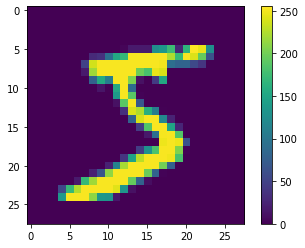

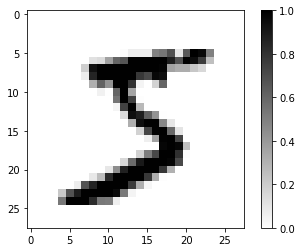

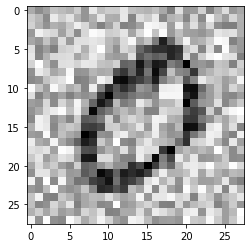

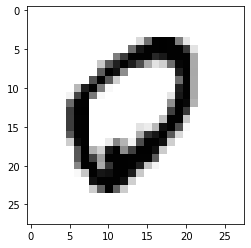

(60001, 28, 28)


In [4]:
# Minima und Maxima der Matrix
print(np.min(train_images))
print(np.max(train_images))



# Altes Label ist die Zahl der Klasse
# Beispiel: Das Bild mit der handgeschriebenen 5 hat das Label 5
print(f"Label davor: {train_labels[0]}")

# Umformung des Labels zu einem Vektor
# Dieser Vektor hat eine 1 an der Stelle 5 (beginnend bei 0) und sonst überall 0

# Haben 10 Klassen (Zahlen von 0-9) und somit 10 Neuronen für die Ausgabe
total_classes = 10
# Hilfsfunktion zur Durchführung der Vektorisierung
train_labels_vectorized = keras.utils.to_categorical(train_labels, total_classes)
print(f"Label danach: {train_labels_vectorized[0]}")

test_labels_vectorized = keras.utils.to_categorical(test_labels, total_classes)

plt.imshow(train_images[0])
plt.colorbar()
plt.show()

normalized_train_images = train_images / 255

# Als colormap (cmap) nutzen wir "binary", da wir nur zwischen weiß und schwarz interpolieren wollen
plt.imshow(normalized_train_images[0], cmap=plt.cm.binary)
plt.colorbar()
plt.show()

# Noise kann beliebig gewählt werden mit Wahl des Zufallsgenerators
noise_matrix = np.random.random((28,28))
# Addieren der Matrix mit Noise auf die ursprüngliche Matrix
new_train_data = normalized_train_images[1] + noise_matrix
# Neues Bild anzeigen
plt.imshow(new_train_data, cmap=plt.cm.binary)
plt.show()

# 2-fache Drehung um 90° (auf dem Kopf stehende 0)
flipped_zero = np.rot90(normalized_train_images[1])
flipped_zero = np.rot90(flipped_zero)

# Neues Bild anzeigen
plt.imshow(flipped_zero, cmap=plt.cm.binary)
plt.show()

# flipped_zero wird zu Array der Länge 1 mit einer 28x28 Matrix
flipped_zero = flipped_zero.reshape(1,28,28)

# Damit können wir das 1x28x28 flipped_zero Array mit dem 60000x28x28 train_images Array zusammenfügen
extended_train_images = np.append(normalized_train_images, flipped_zero, axis=0)
print(extended_train_images.shape)

In [5]:
print(train_images.shape)

(60000, 28, 28)


In [6]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'), 
    keras.layers.Dense(10, activation='sigmoid')

])

In [7]:
#create: Sequential Model and adding the layers
def get_compiled_model(learning_rate):
  model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'), 
    keras.layers.Dense(10, activation='sigmoid')

  ]) #compile: mode
  sgd = keras.optimizers.SGD(lr=learning_rate, decay=1e-6, momentum=0.9, nesterov=True)
  model.compile(
    optimizer=sgd, #Stochastic gradient descent
    loss='mean_squared_error',
    metrics=['accuracy'])
  
  return model

In [ ]:
epochs = [5, 10, 20, 30 , 40 , 50 ]
learning_rates = [0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.3]
results = []
for epoch in epochs:
  inner_results = []
  for learning_rate in learning_rates:
    model = get_compiled_model(learning_rate=learning_rate)
    model.fit(x=train_images,y=train_labels_vectorized, epochs=epoch)
    result = model.evaluate(test_images, test_labels_vectorized)
    inner_results.append(result)
  results.append(inner_results)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0485 - accuracy: 0.7321
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0252 - accuracy: 0.8811
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0201 - accuracy: 0.9003
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9115
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0149 - accuracy: 0.9225
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0401 - accuracy: 0.7907
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0210 - accuracy: 0.8958
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0173 - accuracy: 0.9087
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0156 - accuracy: 0.9170
Epoch 5/5
313/313 [==============================] - 1s 1ms/step - loss: 0.0136 - accuracy: 0

In [9]:
model.fit(train_images, train_labels_vectorized, epochs=10, verbose=True)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0240 - accuracy: 0.8518
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0253 - accuracy: 0.8469
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0243 - accuracy: 0.8475
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0243 - accuracy: 0.8467
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0248 - accuracy: 0.8434
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0264 - accuracy: 0.8315
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0262 - accuracy: 0.8358
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0248 - accuracy: 0.8455
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0257 - accuracy: 0.8387
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.024

In [1]:
print(model.history.history)
loss = model.history.history['loss']
acc = model.history.history['accuracy']

NameError: ignored

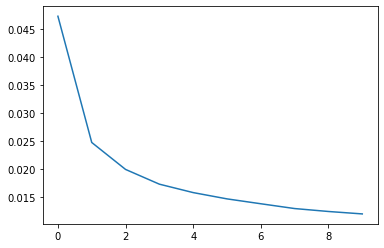

In [9]:
x = [i for i in range(len(loss))]
plt.plot(x, loss)
plt.show()

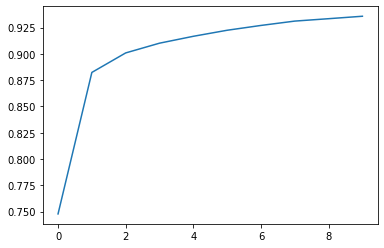

In [10]:
x = [i for i in range(len(acc))]
plt.plot(x, acc)
plt.show()

In [13]:
for i, result in enumerate(results):
  print(f'Learning Rate {learning_rates[i]}  -> Evaluation accuracy {result[1]}')

NameError: ignored